In [1]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Create Toy Dataset

In [2]:
# Define parameters
nb_points = 100

il faut échantilloner des y dans la boule pour un x donné

In [3]:
eps = 1
L = 1

# Create bounding functions

In [4]:
def get_bounds_from_ball(epsilon,x,W,b):
    #### Starting from an input domain B(x, epsilon), we want to minimize and maximize a linear function Wx + b
    # epsilon scalar value
    # x (4,)
    # W (4,)
    # b scalar
    output = W@x - epsilon*np.linalg.norm(W) + b, W@x + epsilon*np.linalg.norm(W) + b # scalar
    return np.array(output) #(1,)

In [5]:
def square_backward_bounds(l, u, y):
    # l (4,)
    # u (4,)
    # y (4,)

    u = u - y
    l = l - y

    W = u + l #(4,)
    b = np.sum(-u*l) - W@y #scalar
    return W, np.array(b)[None]#(4,) & (1,)

In [6]:
def sqrt_backward_bounds(l,u, W_previous, b_previous):
    #stocker h'
    c = (l+u)/2
    W = W_previous*(1/(2*np.sqrt(c)))
    b = 0.5* np.sqrt(c) + (1/(2*np.sqrt(c)))*b_previous
    return W, b

In [7]:
def get_max(W,b,y):
    return minimize(lambda x: W @ x + b, y)

# Test 1D

In [8]:
def f(x):
    return np.sin(x)

In [9]:
i = 1
pt_choosen = 1
num_coordinates = 1

x = np.random.rand(nb_points, num_coordinates)*10-5

In [10]:

# selected_indices = np.random.choice(x.shape[0], size=num_points_to_select, replace=False)
# y = x[selected_indices]

In [11]:
def echantillonner_boule_l2_simple(x, epsilon):
  d = x.shape[0] # Dimension

  # 1. Vecteur gaussien aléatoire (direction)
  u = np.random.randn(d)
  norm_u = np.linalg.norm(u)

  
  # 2. Distance radiale (avec échelle pour uniformité en volume)
  s = np.random.rand() # Échantillon uniforme dans [0, 1)
  r = epsilon * s 

  # 3. Point final = centre + direction_normalisée * distance
  y = x + r * (u / norm_u)

  return y

In [12]:
lower_toy = x-eps
upper_toy = x+eps

In [13]:
x[pt_choosen]

array([2.53536313])

In [14]:
y = echantillonner_boule_l2_simple(x[pt_choosen], eps)

In [15]:
y

array([1.92945042])

In [16]:
lower_toy[pt_choosen]

array([1.53536313])

In [17]:
upper_toy[pt_choosen]

array([3.53536313])

In [18]:
W_1, b_1 = square_backward_bounds(lower_toy[pt_choosen], upper_toy[pt_choosen],y)

In [19]:
W_1

array([1.21182542])

In [20]:
b_1

array([-1.70528729])

In [21]:
x[pt_choosen]

array([2.53536313])

In [22]:
z = np.linspace(x[pt_choosen]-eps, x[pt_choosen]+eps)

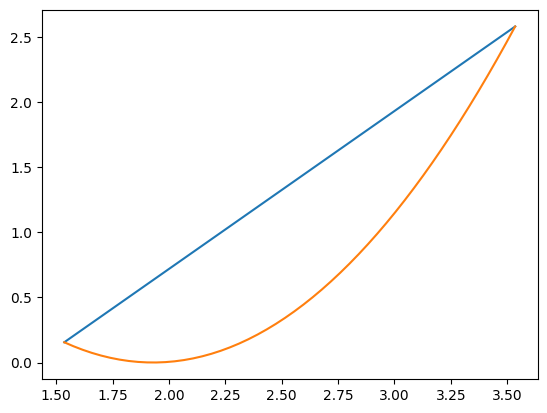

In [23]:
plt.plot(z, W_1*z+b_1)
plt.plot(z, np.square(z-y))
plt.show()

In [24]:
np.sum((x[pt_choosen]-y)**2)

0.36713021497029347

In [25]:
W_1@x[pt_choosen]+b_1

array([1.36713021])

In [26]:
low, up = get_bounds_from_ball(eps, x[pt_choosen], W_1, b_1)

In [27]:
low

array([0.15530479])

In [28]:
up

array([2.57895564])

In [29]:
W_2, b_2 = sqrt_backward_bounds(low,up, W_1, b_1)

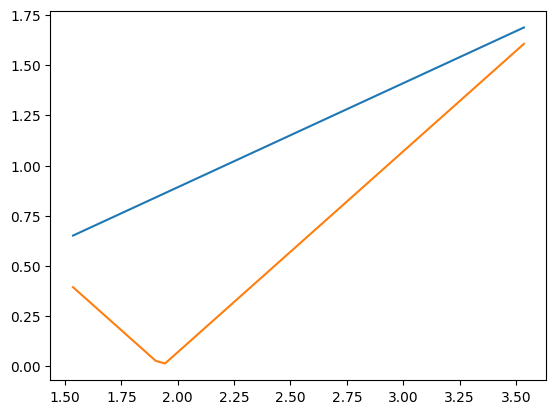

In [30]:
plt.plot(z, W_2*z+b_2)
plt.plot(z, np.sqrt(np.square(z-y)))
plt.show()

In [31]:
W_3 = L*W_2
b_3 = L*b_2 + f(y)


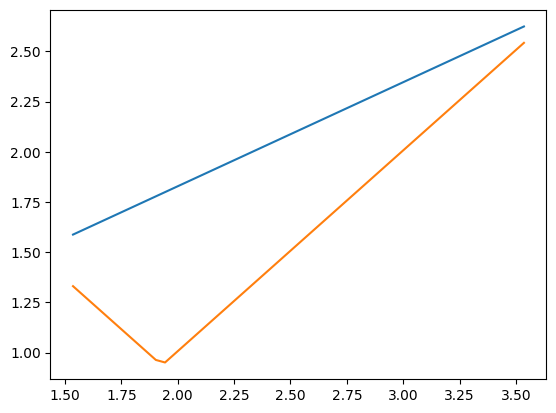

In [32]:
plt.plot(z, W_3*z+b_3)
plt.plot(z, f(y) + L*np.sqrt(np.square(z-y)))
plt.show()

# Test 4D

In [33]:
pt_choosen = 1
num_coordinates = 4

x = np.random.rand(nb_points, num_coordinates)*10-5

In [34]:
def f(x):
    # x shape(4,)
    output = x[0]*x[1]**2+x[2]-x[3] #f(scalar
    return np.array(output)[None]#(batch,1)

In [35]:
lower_toy = x-eps
upper_toy = x+eps

In [36]:
y = echantillonner_boule_l2_simple(x[pt_choosen], eps)

In [37]:
y.shape

(4,)

In [38]:
W_1, b_1 = square_backward_bounds(lower_toy[pt_choosen], upper_toy[pt_choosen],y)

In [39]:
import numpy as np
from scipy.optimize import minimize

In [40]:
def function_to_optimize(x, W, b, y):
    # x (4,)
    output = f(y) + L*np.sqrt(W@x+b) #scalar
    # print(output.shape)
    return output

In [41]:
def jac_function_to_optimize(x, W, b, y):
    output = L/(2*np.sqrt(W@x+b))*W
    # print(output.shape)
    return output

In [42]:
x[pt_choosen-1], x[pt_choosen]

(array([-1.82936209,  4.83994419, -4.72220308, -4.81285842]),
 array([ 3.43013337,  1.28814493, -1.2440061 , -0.31217979]))

In [43]:
# # Define your convex function
# def f(x):
#     # Example: quadratic function
#     return np.dot(x, x) + 3 * x[0] - x[1]  # Replace with your actual function
x_ball_center = x[pt_choosen-1]
# Define the constraint: ||x - x_centre||_2**2 <= eps**2
def unit_ball_constraint(x, x_ball_center, eps):
    return eps**2 - np.linalg.norm(x - x_ball_center)**2

def jacobian_unit_ball_constraint(x, x_ball_center, eps):
    """
    Jacobien (gradient) de la fonction unit_ball_constraint.
    Retourne -x / ||x||_2.
    Non défini à x = 0.
    """
    # norm_x = np.linalg.norm(x)
    # return -x / norm_x
    return -2*(x - x_ball_center)

args_contrainte = (x_ball_center, eps)
# Set up the constraint dictionary
constraints = ({
    'type': 'ineq',  # Inequality constraint: constraint(x) >= 0
    'fun': unit_ball_constraint,
    'jac': jacobian_unit_ball_constraint,
    'args': args_contrainte
})

# Run the optimizer
result = minimize(fun=lambda x :-function_to_optimize(x, W_1, b_1, y), jac= lambda x :-jac_function_to_optimize(x, W_1, b_1, y), x0 = x_ball_center, method='SLSQP', constraints=constraints)
# result = minimize(fun=lambda x :-function_to_optimize(x, W_1, b_1, y), x0 = x_ball_center, method='SLSQP', constraints=constraints)
# attention, le maximum est - result
# Display results
if result.success:
    print("max found at:", result.x)
    print("max value:", -result.fun)
else:
    print("Optimization failed:", result.message)

max found at: [-1.81824045  4.46138072 -4.71963929 -3.88735346]
max value: 7.02342585057732


In [44]:
x_ball_center

array([-1.82936209,  4.83994419, -4.72220308, -4.81285842])

In [45]:
unit_ball_constraint(result.x, x_ball_center, eps)

-1.183511999514053e-08

In [46]:
result.message

'Optimization terminated successfully'

# Application to our NN

In [47]:
import os
os.environ["KERAS_BACKEND"] = "torch"
import keras
import keras.ops as K
from keras.layers import Input, Flatten, Dense
from keras.optimizers import Adam
from keras.metrics import BinaryAccuracy

# from keras.models import Sequential
from deel.lip.model import Sequential

from deel.lip.layers import (
    SpectralDense,
    SpectralConv2D,
    ScaledL2NormPooling2D,
    FrobeniusDense,
)
from deel.lip.activations import GroupSort, GroupSort2
from deel.lip.losses import HKR, KR, HingeMargin, MulticlassHKR, MulticlassKR

import numpy as np
import decomon

from data_processing import load_data, select_data_for_radius_evaluation_MNIST08
from radius_evaluation_tools import compute_binary_certificate, starting_point_dichotomy

In [48]:
x_train, x_test, y_train, y_test, y_test_ord = load_data("MNIST08")

In [49]:
model_path = "/home/aws_install/robustess_project/lip_models/demo3_FC_vanilla_MNIST08_channelfirst_False_disj_Neurons_single_output.keras"
model = keras.models.load_model(model_path)
model.compile(
   
    loss=HKR(
        alpha=10.0, min_margin=1.0
    ),  # HKR stands for the hinge regularized KR loss
    metrics=[
        # KR,  # shows the KR term of the loss
        HingeMargin(min_margin=1.0),  # shows the hinge term of the loss
    ],
    optimizer=Adam(learning_rate=0.001),)

/home/aws_install/miniconda3/envs/k3torchenv/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 12 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [62]:
pt_choosen = 1

In [63]:
x = x_train[pt_choosen:pt_choosen+1].flatten()

In [72]:
eps=0.1

In [73]:
lower_toy = x-eps
upper_toy = x+eps

In [74]:
y = echantillonner_boule_l2_simple(x, eps)

In [75]:
K.amax(K.sqrt((x-y)**2))

tensor(0.0058, device='cuda:0', dtype=torch.float64)

In [76]:
W_1, b_1 = square_backward_bounds(lower_toy, upper_toy,y)

In [77]:
def function_to_optimize(x, W, b, y):
    # x (4,)
    output = model(y.reshape((1,28,28))[None,:]).cpu().detach().numpy()[0,0] + L*np.sqrt(W@x+b) #scalar
    # print(output.shape)
    return output

In [78]:
def jac_function_to_optimize(x, W, b, y):
    output = L/(2*np.sqrt(W@x+b))*W
    # print(output.shape)
    return output

In [79]:
# # Define your convex function
# def f(x):
#     # Example: quadratic function
#     return np.dot(x, x) + 3 * x[0] - x[1]  # Replace with your actual function
x_ball_center = x
x_ball_center = np.asarray(x_ball_center, dtype=np.float64)

# Define the constraint: ||x - x_centre||_2**2 <= eps**2
def unit_ball_constraint(x, x_ball_center, eps):
    return eps**2 - np.linalg.norm(x - x_ball_center)**2

def jacobian_unit_ball_constraint(x, x_ball_center, eps):
    """
    Jacobien (gradient) de la fonction unit_ball_constraint.
    Retourne -x / ||x||_2.
    Non défini à x = 0.
    """
    # norm_x = np.linalg.norm(x)
    # return -x / norm_x
    return -2*(x - x_ball_center)

args_contrainte = (x_ball_center, eps)
# Set up the constraint dictionary
constraints = ({
    'type': 'ineq',  # Inequality constraint: constraint(x) >= 0
    'fun': unit_ball_constraint,
    'jac': jacobian_unit_ball_constraint,
    'args': args_contrainte
})

# Run the optimizer
result = minimize(fun=lambda x :-function_to_optimize(x, W_1, b_1, y), jac= lambda x :-jac_function_to_optimize(x, W_1, b_1, y), x0 = x_ball_center, method='SLSQP', constraints=constraints)
# result = minimize(fun=lambda x :-function_to_optimize(x, W_1, b_1, y), x0 = x_ball_center, method='SLSQP', constraints=constraints)
# attention, le maximum est - result
# Display results
if result.success:
    print("max found at:", result.x)
    print("max value:", -result.fun)
else:
    print("Optimization failed:", result.message)

max found at: [ 4.07387174e-03  1.53294289e-03  2.51479526e-03 -2.48138783e-03
 -7.41518784e-06 -6.77321539e-03  2.53179568e-03  2.51342487e-03
 -4.44241402e-04 -5.56157754e-03 -1.84000279e-03 -4.67636286e-03
 -1.32534035e-04  5.83508092e-04  2.81752444e-03 -5.64911136e-03
  3.04619485e-03 -3.87385115e-03 -4.73411693e-04  9.27916460e-04
 -6.13774565e-04 -3.08578195e-03 -3.12293335e-04 -3.88273278e-03
  2.93359382e-03  1.19612498e-03 -2.31394462e-03  4.30792736e-04
 -5.56243218e-04  5.39514977e-04  1.24611992e-03 -1.70397929e-03
  3.45164106e-03  1.65810344e-04 -8.05032460e-03 -6.30600931e-03
  4.18753042e-03  1.03831216e-03 -1.75624446e-03  2.08681918e-04
  8.00669692e-04 -4.96058909e-04  2.43950454e-03 -2.26831460e-03
  7.49531917e-04  2.10498372e-03  1.07883860e-03 -1.35732511e-03
  6.58651221e-03  2.62691767e-03  1.47655370e-03 -1.44262254e-03
  9.20131476e-04  7.07622218e-04  4.38703680e-04 -4.79375283e-04
 -9.93790301e-04  5.81438338e-05 -6.88734159e-03 -5.61647826e-03
  1.3764613

In [60]:
model(x.reshape((1,28,28))[None,:])

tensor([[-3.8370]], device='cuda:0', grad_fn=<MmBackward0>)

In [61]:
model(x_train[pt_choosen:pt_choosen+1])

tensor([[-3.8370]], device='cuda:0', grad_fn=<MmBackward0>)